In [1]:
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
import matplotlib.pyplot as plt
import numpy as np

# Juptyer magic: For export. Makes the plots size right for the screen 
%matplotlib inline
# %config InlineBackend.figure_format = 'retina'

%config InlineBackend.figure_formats = ['svg'] 


torch.backends.cudnn.deterministic = True
torch.manual_seed(2)
torch.cuda.manual_seed(2)

g = torch.Generator()
g.manual_seed(1)


# Data preparation

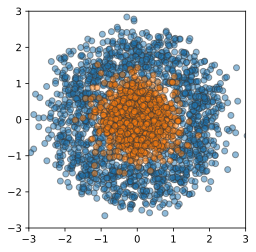

In [2]:
data_noise = 0.25
plotlim = [-3, 3]
subfolder = 'evo_circ'


from models.training import create_dataloader
dataloader, dataloader_viz = create_dataloader('circles', noise = data_noise, plotlim = plotlim)


In [3]:
#We can now conveniently access the data from the dataloaders
for X_test, y_test in dataloader_viz:
    print(X_test[:10], y_test[:10])
    break
    

tensor([[-0.9727,  1.0339],
        [-0.5211, -0.2966],
        [ 0.0807, -0.4484],
        [ 0.2511, -0.5861],
        [ 0.6857, -0.0740],
        [ 0.9015, -0.0085],
        [ 0.2255, -0.3790],
        [ 0.9412,  1.0423],
        [ 1.1090,  1.1829],
        [-0.9981, -0.1249]]) tensor([0, 1, 1, 1, 1, 0, 1, 1, 0, 0])


# Model dynamics

In [4]:
#Import of the model dynamics that describe the neural ODE
#The dynamics are based on the torchdiffeq package, that implements ODE solvers in the pytorch setting
from models.neural_odes import NeuralODE

#for neural ODE based networks the network width is constant. In this example the input is 2 dimensional
hidden_dim, data_dim = 2, 2 
augment_dim = 0

#T is the end time of the neural ODE evolution, num_steps are the amount of discretization steps for the ODE solver
T, num_steps = 10, 10 
bound = 0.
fp = False #this recent change made things not work anymore
cross_entropy = True
turnpike = False

non_linearity = 'tanh' #'relu' #
architecture = 'inside' #outside



torch.manual_seed(2)
torch.cuda.manual_seed(2)
anode = NeuralODE(device, data_dim, hidden_dim, augment_dim=augment_dim, non_linearity=non_linearity, 
                    architecture=architecture, T=T, time_steps=num_steps, fixed_projector=fp, cross_entropy=cross_entropy)
optimizer_anode = torch.optim.Adam(anode.parameters(), lr=1e-3) 


print(anode)

NeuralODE(
  (flow): Semiflow(
    (dynamics): Dynamics(
      (non_linearity): Tanh()
      (fc2_time): Sequential(
        (0): Linear(in_features=2, out_features=2, bias=True)
        (1): Linear(in_features=2, out_features=2, bias=True)
        (2): Linear(in_features=2, out_features=2, bias=True)
        (3): Linear(in_features=2, out_features=2, bias=True)
        (4): Linear(in_features=2, out_features=2, bias=True)
        (5): Linear(in_features=2, out_features=2, bias=True)
        (6): Linear(in_features=2, out_features=2, bias=True)
        (7): Linear(in_features=2, out_features=2, bias=True)
        (8): Linear(in_features=2, out_features=2, bias=True)
        (9): Linear(in_features=2, out_features=2, bias=True)
      )
    )
  )
  (linear_layer): Linear(in_features=2, out_features=2, bias=True)
  (non_linearity): Tanh()
)


In [5]:
torch.manual_seed(2)
torch.cuda.manual_seed(2)
rnode = NeuralODE(device, data_dim, hidden_dim, augment_dim=0, non_linearity=non_linearity, 
                    architecture=architecture, T=T, time_steps=num_steps, fixed_projector=fp, cross_entropy=cross_entropy)
optimizer_rnode = torch.optim.Adam(rnode.parameters(), lr=1e-3) 


print(rnode)

NeuralODE(
  (flow): Semiflow(
    (dynamics): Dynamics(
      (non_linearity): Tanh()
      (fc2_time): Sequential(
        (0): Linear(in_features=2, out_features=2, bias=True)
        (1): Linear(in_features=2, out_features=2, bias=True)
        (2): Linear(in_features=2, out_features=2, bias=True)
        (3): Linear(in_features=2, out_features=2, bias=True)
        (4): Linear(in_features=2, out_features=2, bias=True)
        (5): Linear(in_features=2, out_features=2, bias=True)
        (6): Linear(in_features=2, out_features=2, bias=True)
        (7): Linear(in_features=2, out_features=2, bias=True)
        (8): Linear(in_features=2, out_features=2, bias=True)
        (9): Linear(in_features=2, out_features=2, bias=True)
      )
    )
  )
  (linear_layer): Linear(in_features=2, out_features=2, bias=True)
  (non_linearity): Tanh()
)


# Training and generating level sets

In [6]:
from models.training import Trainer, doublebackTrainer
import imageio, os
from plots.plots import train_to_classifier_imgs

num_epochs = 50 #number of optimization runs in which the dataset is used for gradient decent
plotfreq = 5


trainer_anode = doublebackTrainer(anode, optimizer_anode, device, cross_entropy=cross_entropy, turnpike = turnpike,
                         bound=bound, fixed_projector=fp, verbose = True, eps = 0, eps_comp = 0.2) 

   
train_to_classifier_imgs(anode, trainer_anode, dataloader, subfolder, num_epochs, plotfreq)


epoch =0
0.2

Iteration 0/45
Loss: 1.573
Robust Term Loss: 0.124
Accuracy: 0.406

Iteration 10/45
Loss: 1.332
Robust Term Loss: 0.127
Accuracy: 0.422

Iteration 20/45
Loss: 1.124
Robust Term Loss: 0.130
Accuracy: 0.422

Iteration 30/45
Loss: 0.968
Robust Term Loss: 0.109
Accuracy: 0.500

Iteration 40/45
Loss: 0.870
Robust Term Loss: 0.110
Accuracy: 0.500
Epoch 1: 1.161
0.2

Iteration 0/45
Loss: 1.052
Robust Term Loss: 0.116
Accuracy: 0.375

Iteration 10/45
Loss: 0.995
Robust Term Loss: 0.129
Accuracy: 0.375

Iteration 20/45
Loss: 0.839
Robust Term Loss: 0.119
Accuracy: 0.375

Iteration 30/45
Loss: 0.759
Robust Term Loss: 0.099
Accuracy: 0.453

Iteration 40/45
Loss: 0.720
Robust Term Loss: 0.095
Accuracy: 0.500
Epoch 2: 0.868
0.2

Iteration 0/45
Loss: 0.776
Robust Term Loss: 0.090
Accuracy: 0.391

Iteration 10/45
Loss: 0.830
Robust Term Loss: 0.108
Accuracy: 0.312

Iteration 20/45
Loss: 0.721
Robust Term Loss: 0.095
Accuracy: 0.406

Iteration 30/45
Loss: 0.687
Robust Term Loss: 0.084
A

In [7]:
from models.training import Trainer, doublebackTrainer
import imageio, os


trainer_rnode = doublebackTrainer(rnode, optimizer_rnode, device, cross_entropy=cross_entropy, turnpike = turnpike,
                         bound=bound, fixed_projector=fp, verbose = True, eps = 0.2) 



train_to_classifier_imgs(rnode, trainer_rnode, dataloader, subfolder, num_epochs, plotfreq, filename = 'rob')


epoch =0
0.2

Iteration 0/45
Loss: 1.382
Robust Term Loss: 0.124
Accuracy: 0.406

Iteration 10/45
Loss: 1.183
Robust Term Loss: 0.118
Accuracy: 0.453

Iteration 20/45
Loss: 1.019
Robust Term Loss: 0.113
Accuracy: 0.453

Iteration 30/45
Loss: 0.871
Robust Term Loss: 0.090
Accuracy: 0.516

Iteration 40/45
Loss: 0.791
Robust Term Loss: 0.088
Accuracy: 0.516
Epoch 1: 1.038
0.2

Iteration 0/45
Loss: 0.953
Robust Term Loss: 0.087
Accuracy: 0.375

Iteration 10/45
Loss: 0.881
Robust Term Loss: 0.094
Accuracy: 0.406

Iteration 20/45
Loss: 0.763
Robust Term Loss: 0.085
Accuracy: 0.406

Iteration 30/45
Loss: 0.673
Robust Term Loss: 0.070
Accuracy: 0.484

Iteration 40/45
Loss: 0.638
Robust Term Loss: 0.068
Accuracy: 0.500
Epoch 2: 0.773
0.2

Iteration 0/45
Loss: 0.708
Robust Term Loss: 0.062
Accuracy: 0.375

Iteration 10/45
Loss: 0.716
Robust Term Loss: 0.073
Accuracy: 0.359

Iteration 20/45
Loss: 0.640
Robust Term Loss: 0.065
Accuracy: 0.375

Iteration 30/45
Loss: 0.599
Robust Term Loss: 0.061
A

# Loss plots

trainer_rnode.eps = 0.2


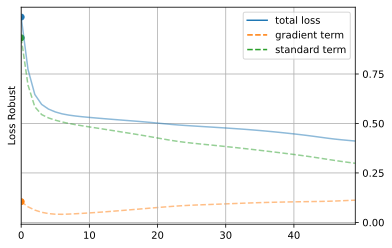

no filename given


In [8]:
from enum import auto

from plots.plots import loss_evolution
print(f'{trainer_rnode.eps = }')
loss_evolution(trainer_rnode, 0)

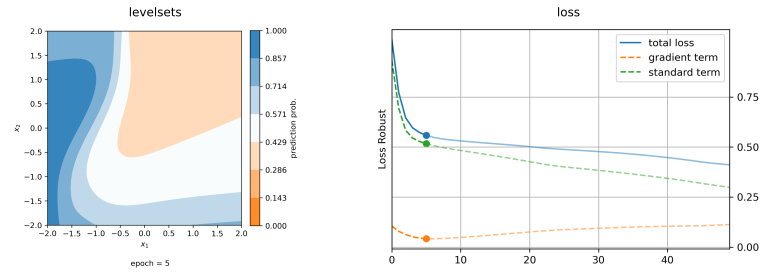

In [9]:
from plots.plots import comparison_plot

epoch = 5
fig_name_base = os.path.join(subfolder, '')
loss_evolution(trainer_rnode, epoch, 'loss_pic')
comparison_plot(fig_name_base + str(epoch) + '.png', 'levelsets', 'loss_pic.png', 'loss', 'test', show = True, figsize = (12,4))

## gif generation

In [10]:
from plots.gifs import evo_gif
gif = evo_gif(trainer_anode, num_epochs, plotfreq, subfolder, '')

0
5
10
15
20
25
30
35
40
45
evo_circ/evo.gif  created


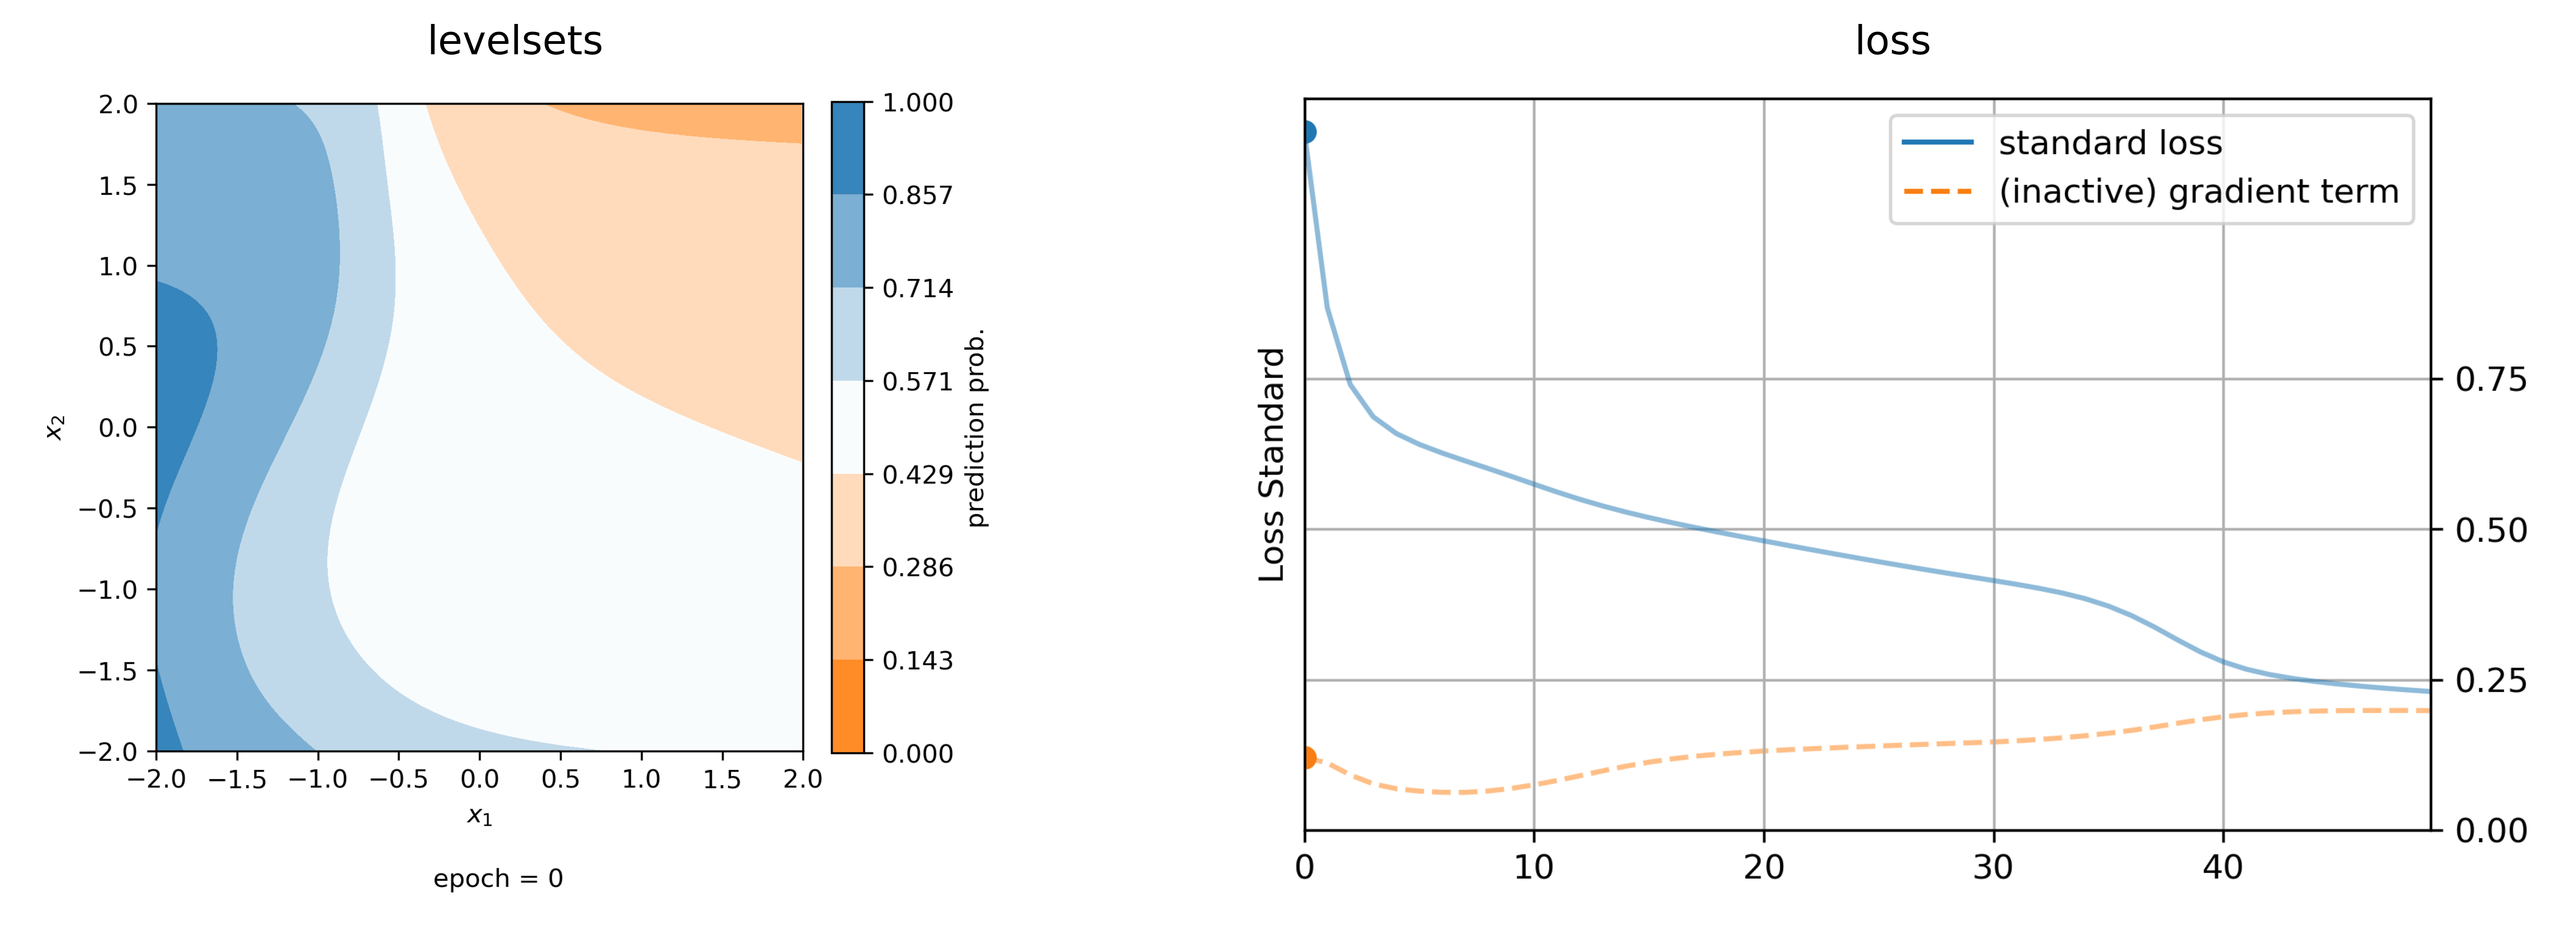

In [11]:
from IPython.display import Image
Image(filename = gif, width = 800)

In [12]:
rob_gif = evo_gif(trainer_rnode, num_epochs, plotfreq, subfolder, 'rob')

from IPython.display import Image
Image(filename = rob_gif, width = 800)

0
5
10
15
